# **Credit Cards**


Credit cards are financial tools that allow individuals to make purchases on credit, providing them with convenient access to funds for various transactions. These cards are issued by financial institutions, such as banks or credit card companies, and come with a predetermined credit limit that represents the maximum amount a cardholder can borrow.
Credit cards offer several benefits and features that make them widely used in today's world. Here are some key aspects to consider:


Utilizing machine learning approaches to predict credit card approval based on customer information.


A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


# Introduction 

The data contains below fileds

Features name: (Credit_Card.csv)

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information

ID: The joining key between application data and credit status data, same is Ind_ID

Label: 0 is application approved and 1 is application rejected. 


**EDA**

In [1]:
# Importing required libraries for data maniplation

import pandas as pd
import numpy as np

# Importing required libraries for data Visualzation

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "/kaggle/input/predict-credit-card-approval/Credit_card.csv"
file_path2 = "/kaggle/input/predict-credit-card-approval/Credit_card_label.csv"
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)
df.head()
# df2.info()
# df.describe()
# df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
df.shape

(1548, 18)

**Data Cleaning**

In [4]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [5]:
unique_values_pandas = df['Type_Occupation'].unique()
print(unique_values_pandas)

[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [6]:
df = df.drop_duplicates('Ind_ID', keep='last') # lastly, droping the duplicate values of persons IDs
df['Age']=-(df['Birthday_count'])//365 # converting birthday_count to proper format of age

# droping unnecessary columns and rows
df = df.dropna(subset=['Annual_income', 'GENDER', 'Birthday_count','Type_Occupation'], axis=0)
df = df.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID','Type_Occupation','Birthday_count'],axis=1)

In [7]:
df.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Family_Members    0
Age               0
dtype: int64

In [8]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,Age
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-678,3,49.0
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-678,3,49.0
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-678,1,49.0
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1002,2,51.0
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1002,2,51.0


In [9]:
unique_values_per_column = df.apply(lambda col: col.unique())
print(unique_values_per_column)

Ind_ID            [5010864, 5010868, 5010869, 5018498, 5018503, ...
GENDER                                                       [M, F]
Car_Owner                                                    [Y, N]
Propert_Owner                                                [Y, N]
CHILDREN                                        [1, 0, 2, 4, 3, 14]
Annual_income     [450000.0, 90000.0, 270000.0, 126000.0, 202500...
Type_Income       [Commercial associate, Pensioner, Working, Sta...
EDUCATION         [Secondary / secondary special, Higher educati...
Marital_status    [Married, Single / not married, Civil marriage...
Housing_type      [House / apartment, Rented apartment, Municipa...
Employed_days     [-678, -1002, -248, -2470, -1674, -1086, -925,...
Family_Members                               [3, 1, 2, 4, 6, 5, 15]
Age               [49.0, 51.0, 46.0, 32.0, 48.0, 33.0, 43.0, 54....
dtype: object


**DATA PRE PROCESSING**

In [10]:
# parse the data type object.
# It is necessary to determine whether they have any value for evaluating credit,
# and also to evaluate the possibility of converting data to a numeric type.

objects_data = pd.DataFrame(df.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type

1            GENDER
2         Car_Owner
3     Propert_Owner
6       Type_Income
7         EDUCATION
8    Marital_status
9      Housing_type
Name: index, dtype: object

**FEATURE ENGINEERING
FEATURE SELECTION AND TRANSFORMATION**

In [11]:
df['Employment_Status'] = df['Employed_days'].apply(lambda x: 1 if x < 0 else 0)

In [12]:
df = df.drop(['Employed_days'],axis=1)

In [13]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,3,49.0,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,3,49.0,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,49.0,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,2,51.0,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,2,51.0,1


In [14]:
# converting all non-numeric data to numeric data using LabelEncoder()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df:
    if df[x].dtypes == 'object':
        df[x] = le.fit_transform(df[x])

In [15]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status
8,5010864,1,1,1,1,450000.0,0,3,1,1,3,49.0,1
9,5010868,1,1,1,1,450000.0,1,3,1,1,3,49.0,1
10,5010869,1,1,1,1,450000.0,0,3,3,1,1,49.0,1
11,5018498,0,1,1,0,90000.0,3,3,1,1,2,51.0,1
13,5018503,0,1,1,0,90000.0,3,3,1,1,2,51.0,1


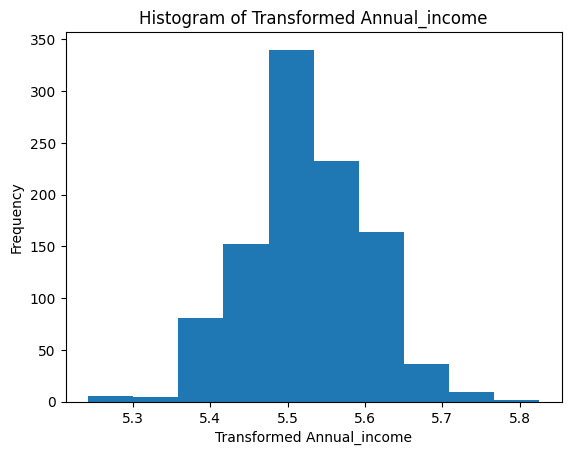

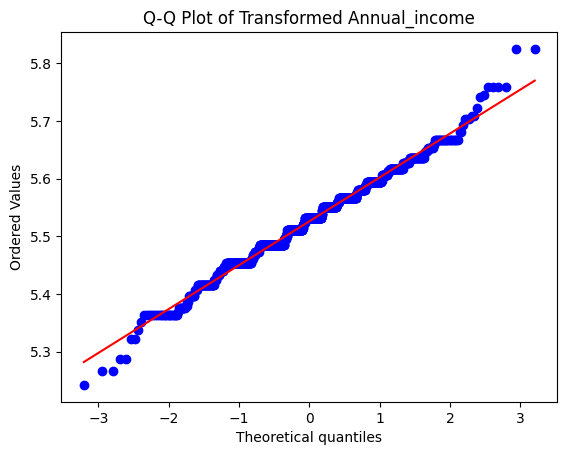

In [16]:
#Transforming Annual Income

import scipy.stats as stats
# Select the column you want to transform
column_names = ['Annual_income']

for column_name in column_names:
    # Apply Box-Cox transformation
    transformed_data, lambda_val = stats.boxcox(df[column_name])
    df[column_name] = transformed_data

    # Plot histogram of transformed data
    plt.hist(transformed_data, bins=10)
    plt.xlabel('Transformed ' + column_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of Transformed ' + column_name)
    plt.show()

    # Create Q-Q plot of transformed data
    stats.probplot(transformed_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Transformed ' + column_name)
    plt.show()


In [17]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status
8,5010864,1,1,1,1,5.667662,0,3,1,1,3,49.0,1
9,5010868,1,1,1,1,5.667662,1,3,1,1,3,49.0,1
10,5010869,1,1,1,1,5.667662,0,3,3,1,1,49.0,1
11,5018498,0,1,1,0,5.415751,3,3,1,1,2,51.0,1
13,5018503,0,1,1,0,5.415751,3,3,1,1,2,51.0,1


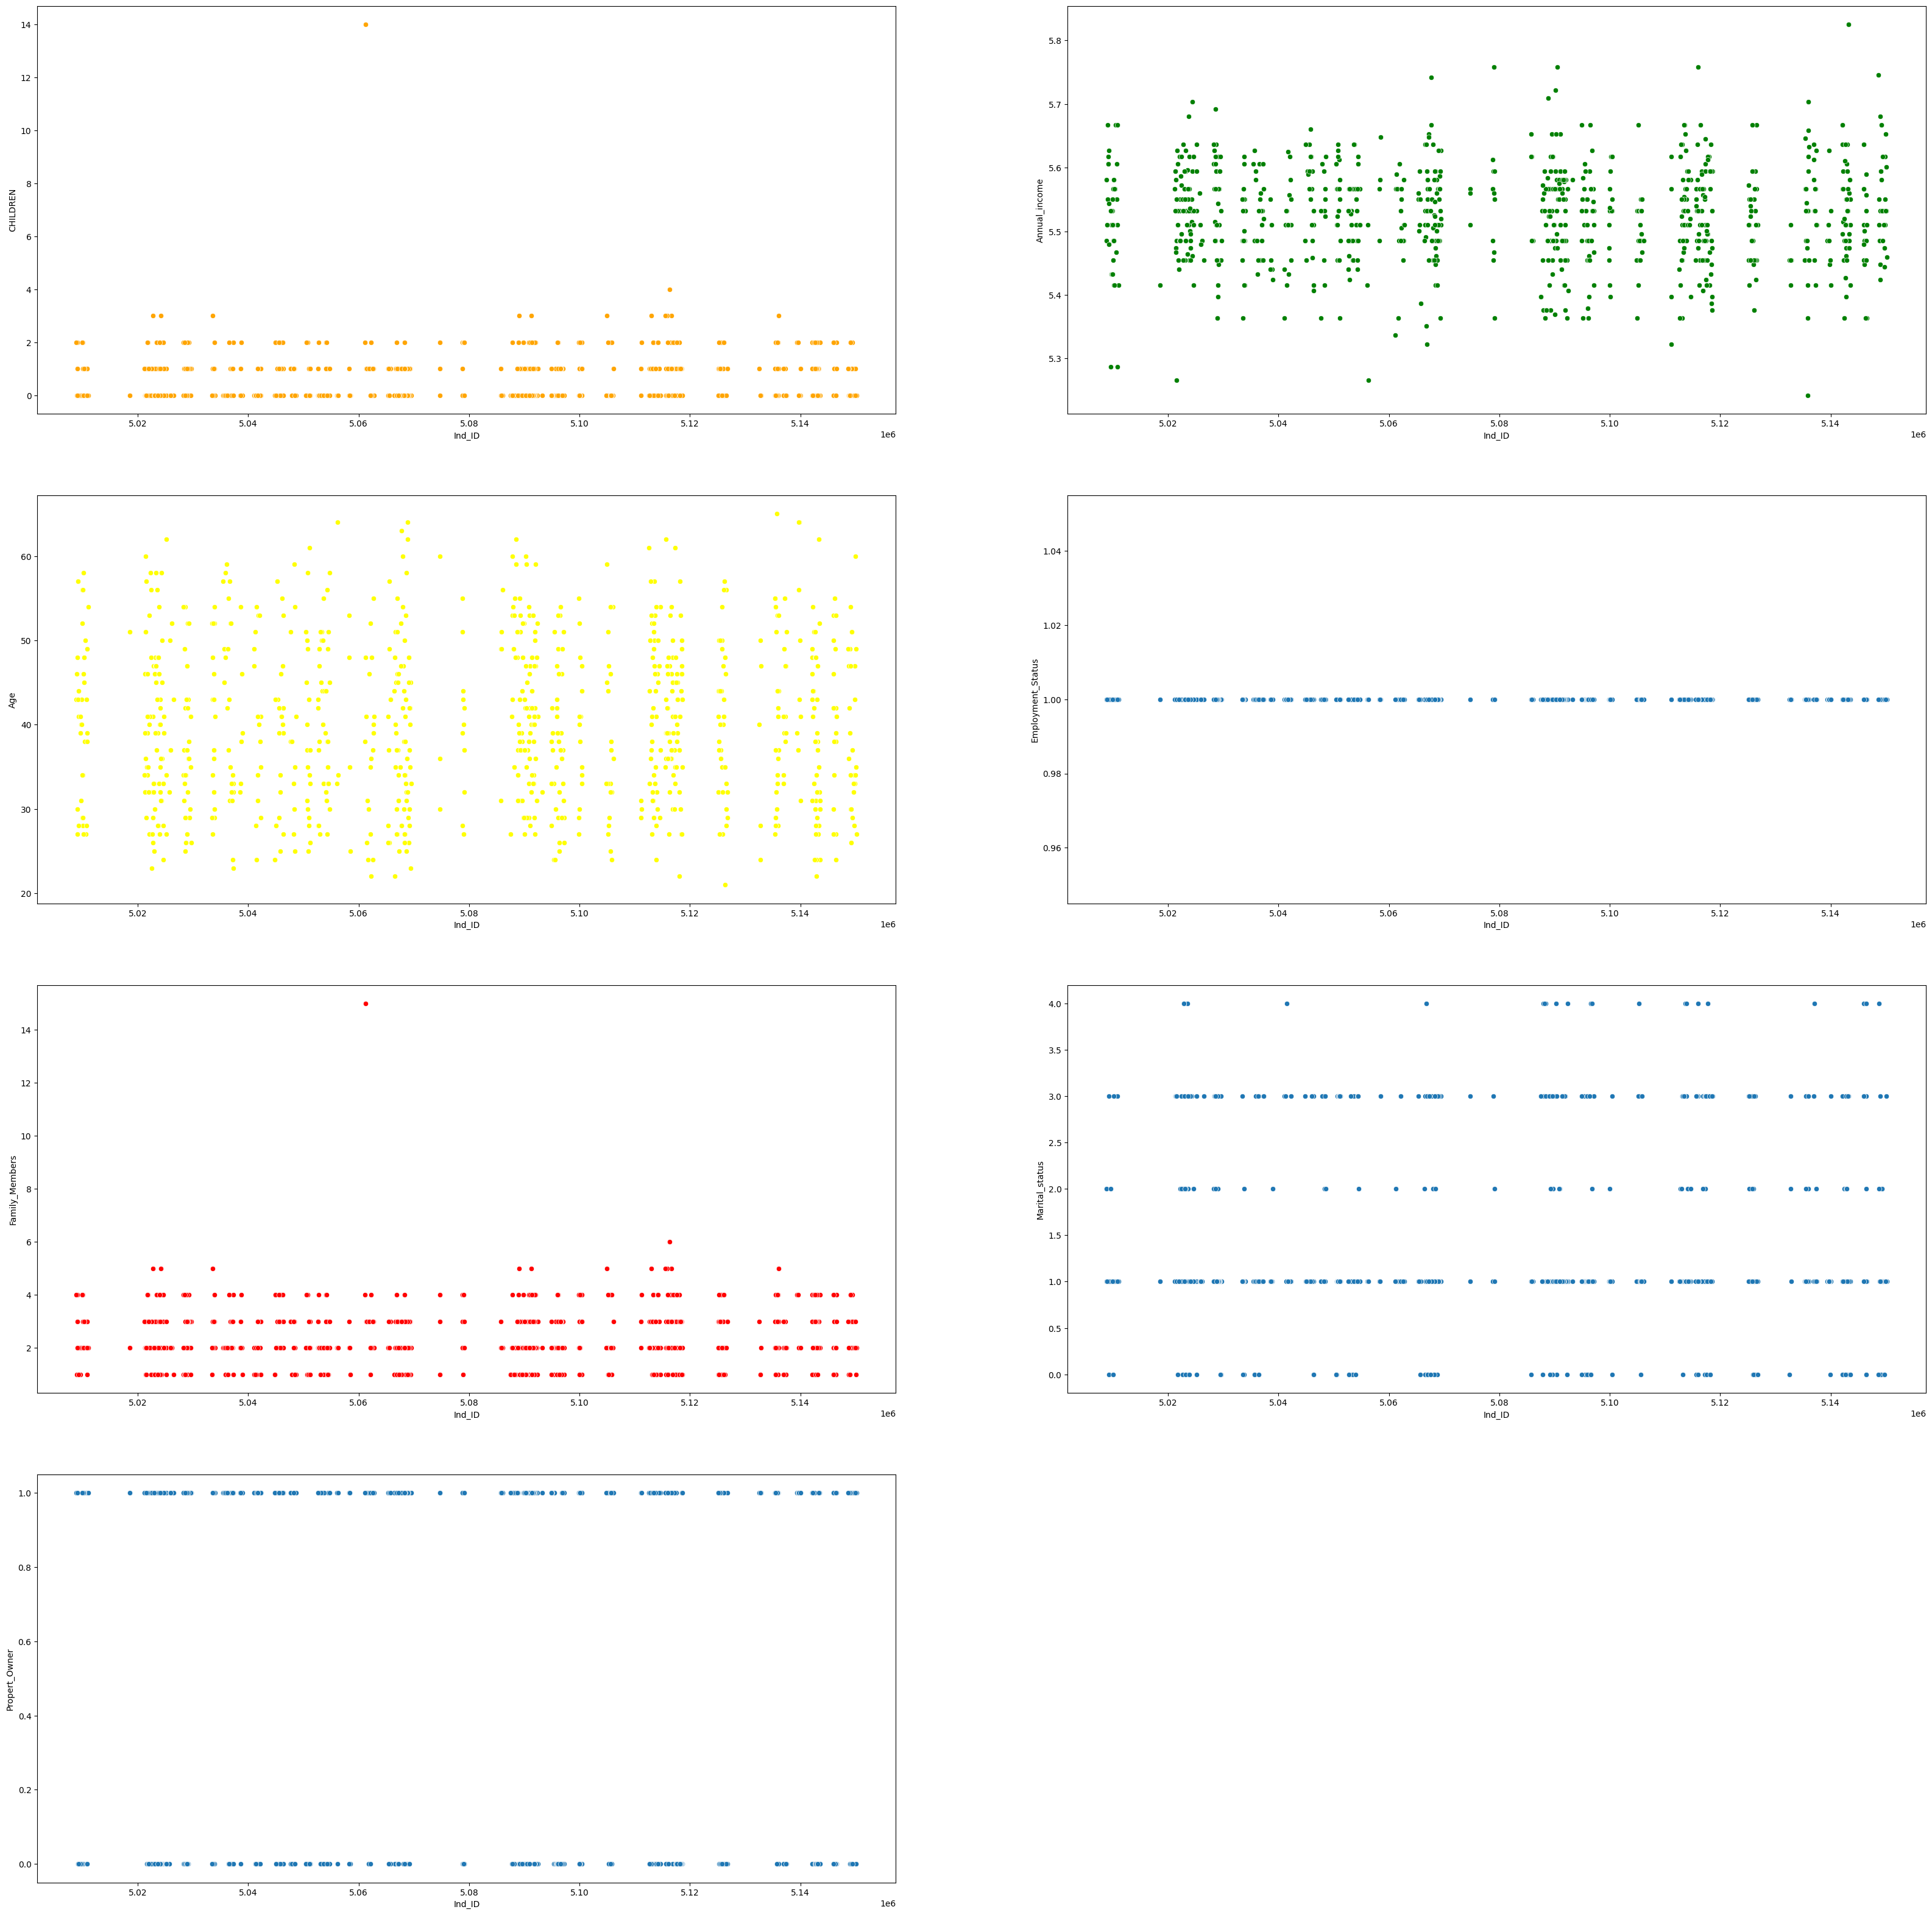

In [18]:
# Visualization of Children,Anual income,Age,Employment status, family members, marital status and property owner details wrt ID
fig, ax= plt.subplots(nrows= 4, ncols = 2, figsize= (40,40))

sns.scatterplot(x='Ind_ID', y='CHILDREN', data=df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='Ind_ID', y='Annual_income', data=df, ax=ax[0][1], color='Green')
sns.scatterplot(x='Ind_ID', y='Age', data=df, ax=ax[1][0], color ='yellow')
sns.scatterplot(x='Ind_ID', y='Employment_Status', data=df, ax=ax[1][1])
sns.scatterplot(x='Ind_ID', y='Family_Members', data=df, ax=ax[2][0], color= 'red')
sns.scatterplot(x='Ind_ID', y='Marital_status', data=df, ax=ax[2][1])
sns.scatterplot(x='Ind_ID', y='Propert_Owner', data=df, ax=ax[3][0])
fig.delaxes(ax[3][1])



# So, as a result, we have emissions in children,Annual_income,Age and Family_Members
# Need to exclude outliers from the data so this can't have a bad effect on model training

Removing Outliers by calculating the 99.9th percentile of the children,Annual_income,Age and Family_Members columns. This will be used as the upper threshold for removing outliers
and Calculating the 0.1st percentile of these columns. This will be used as the lower threshold for removing outliers

In [19]:
# for children removing outliers
q_hi = df['CHILDREN'].quantile(0.999) # Calculates the 99.9th percentile of the 'CHILDREN' column. This will be used as the upper threshold for removing outliers
q_low = df['CHILDREN'].quantile(0.001) # Calculates the 0.1st percentile of the 'CHILDREN' column. This will be used as the lower threshold for removing outliers
df = df[(df['CHILDREN']>q_low) & (df['CHILDREN']<q_hi)]

# Filters the DataFrame to keep only those rows where the 'CHILDREN' column values are greater than the lower threshold (q_low) and less than the upper threshold (q_hi). This effectively removes outliers from the 'CHILDREN' column.

In [20]:
# for Annual_income
q_hi = df['Annual_income'].quantile(0.999)
q_low = df['Annual_income'].quantile(0.001)
df = df[(df['Annual_income']>q_low) & (df['Annual_income']<q_hi)]

In [21]:
# for Family_Members
q_hi = df['Family_Members'].quantile(0.999)
q_low = df['Family_Members'].quantile(0.001)
df = df[(df['Family_Members']>q_low) & (df['Family_Members']<q_hi)]


In [22]:
# for Age
q_hi = df['Age'].quantile(0.999)
q_low = df['Age'].quantile(0.001)
df = df[(df['Age']>q_low) & (df['Age']<q_hi)]

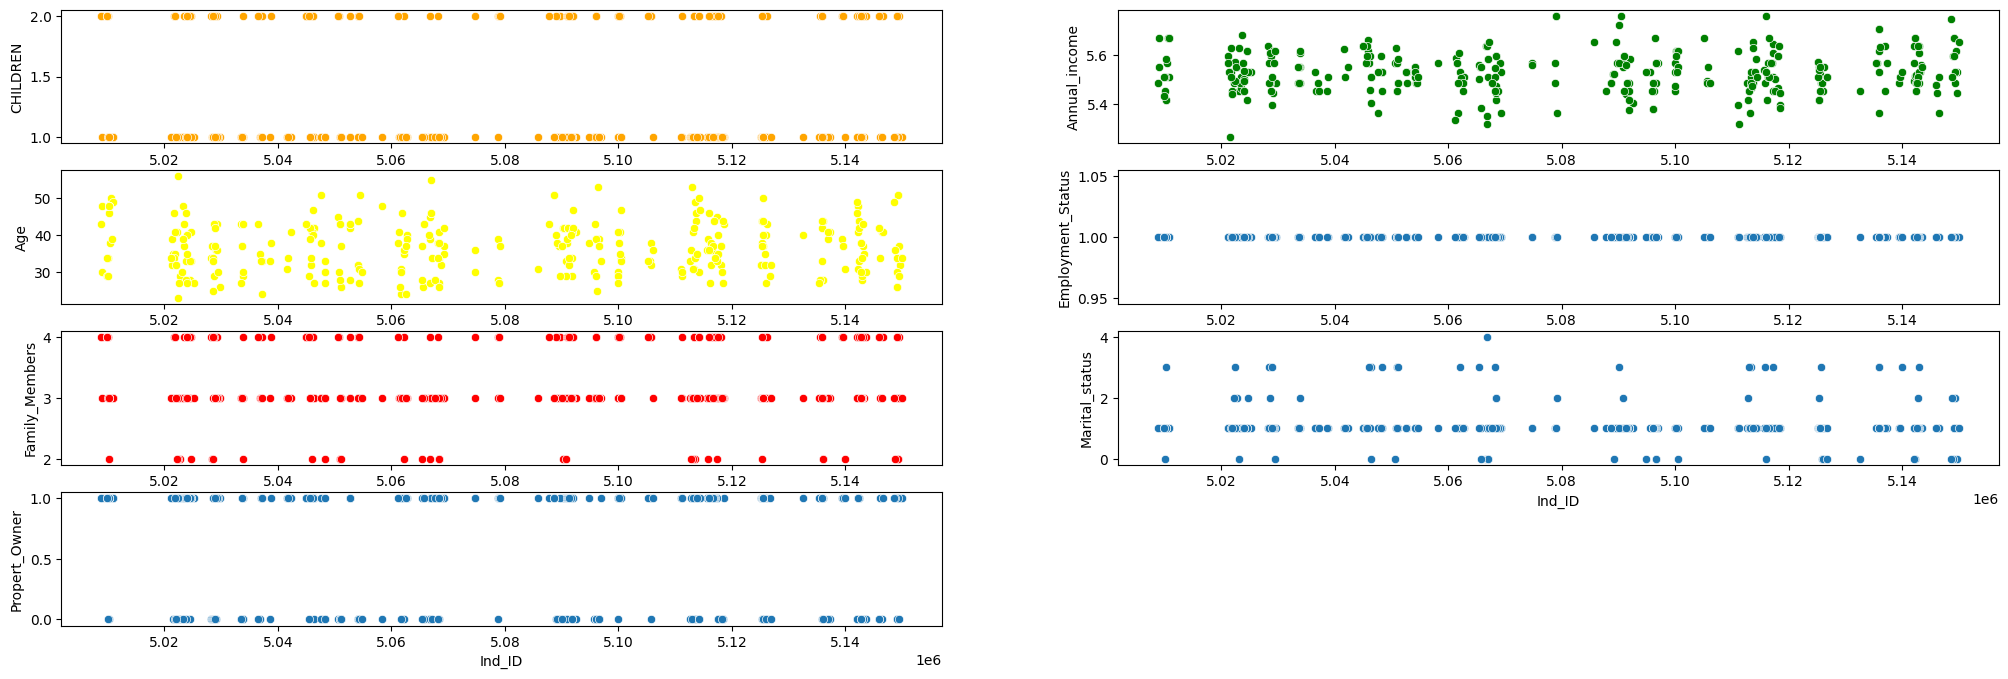

In [23]:
#Visualizing again after removing outliers

fig, ax= plt.subplots(nrows= 4, ncols = 2, figsize= (25,8))

sns.scatterplot(x='Ind_ID', y='CHILDREN', data=df, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='Ind_ID', y='Annual_income', data=df, ax=ax[0][1], color='Green')
sns.scatterplot(x='Ind_ID', y='Age', data=df, ax=ax[1][0], color ='yellow')
sns.scatterplot(x='Ind_ID', y='Employment_Status', data=df, ax=ax[1][1])
sns.scatterplot(x='Ind_ID', y='Family_Members', data=df, ax=ax[2][0], color= 'red')
sns.scatterplot(x='Ind_ID', y='Marital_status', data=df, ax=ax[2][1])
sns.scatterplot(x='Ind_ID', y='Propert_Owner', data=df, ax=ax[3][0])
fig.delaxes(ax[3][1])

In [24]:
# lets check outlies


from scipy.stats import zscore

# Calculate the z-scores for the 'CHILDREN' column
z_scores = zscore(df['Annual_income'])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers based on the z-scores
outliers = df[np.abs(z_scores) > threshold]

In [25]:
outliers

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status
855,5021584,0,0,0,1,5.265939,2,3,1,4,3,35.0,1


In [26]:
# We have significantly reduced the data set...
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 8 to 1545
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ind_ID             340 non-null    int64  
 1   GENDER             340 non-null    int64  
 2   Car_Owner          340 non-null    int64  
 3   Propert_Owner      340 non-null    int64  
 4   CHILDREN           340 non-null    int64  
 5   Annual_income      340 non-null    float64
 6   Type_Income        340 non-null    int64  
 7   EDUCATION          340 non-null    int64  
 8   Marital_status     340 non-null    int64  
 9   Housing_type       340 non-null    int64  
 10  Family_Members     340 non-null    int64  
 11  Age                340 non-null    float64
 12  Employment_Status  340 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 37.2 KB


**Data Visualization**

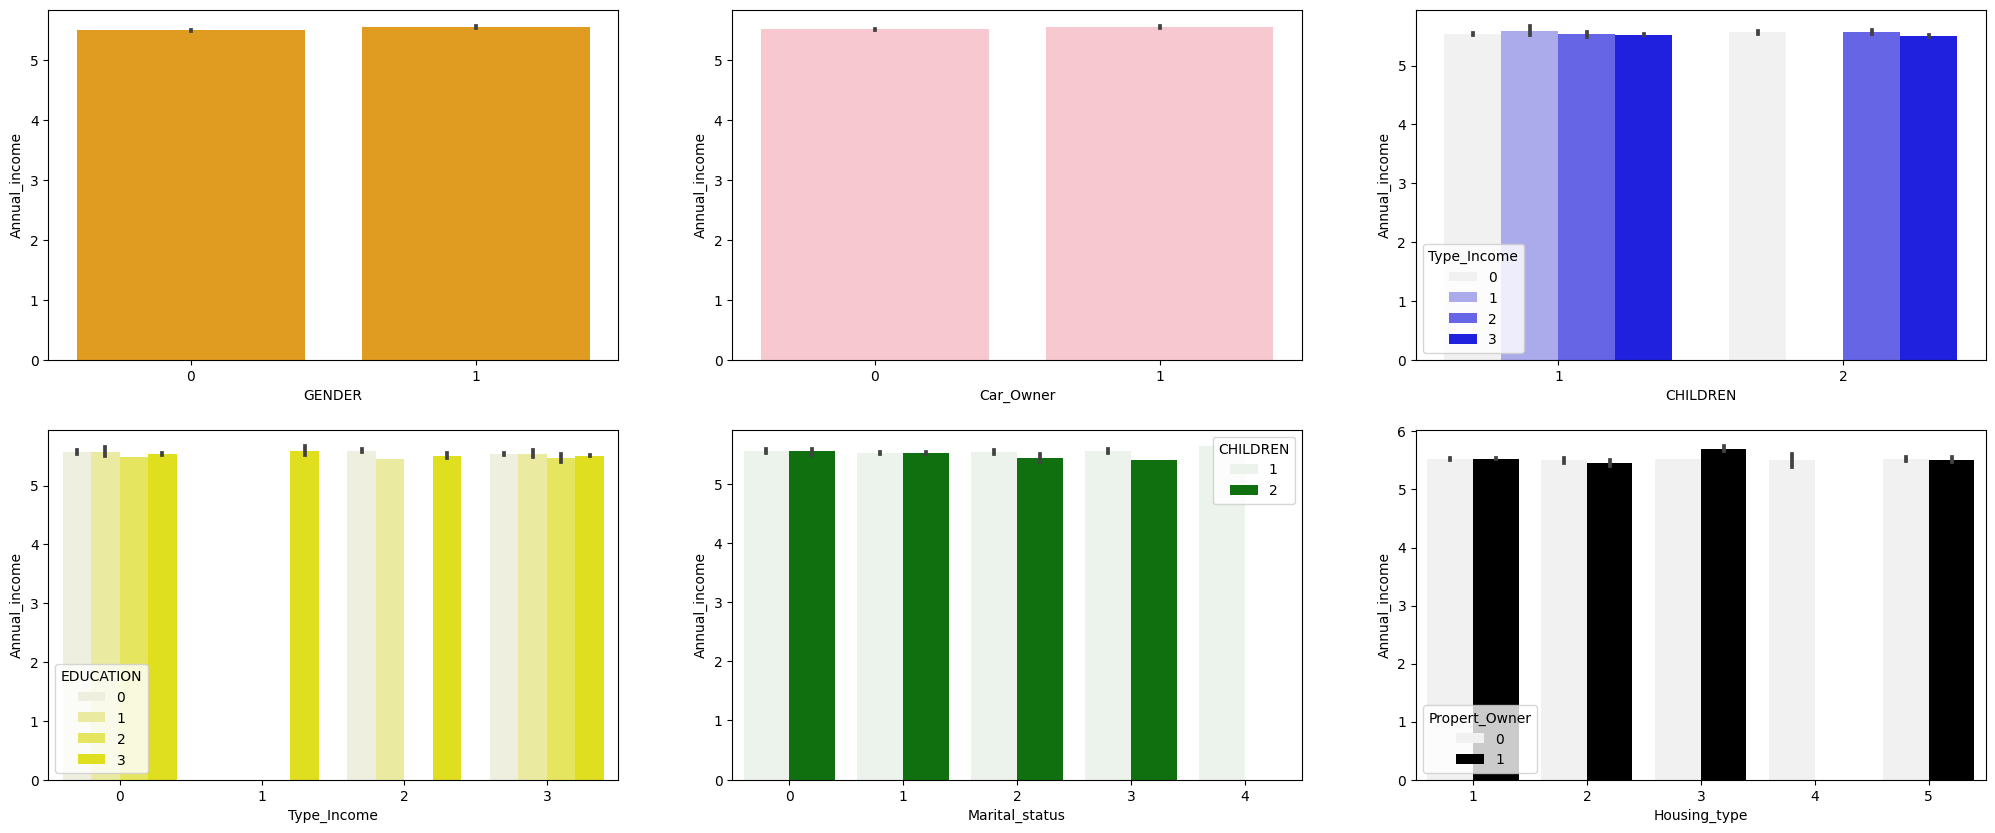

In [27]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (25,10))

sns.barplot(x='GENDER', y='Annual_income', data=df, ax=ax[0][0], color= 'orange')
sns.barplot(x='Car_Owner', y='Annual_income', data=df, ax=ax[0][1], color= 'pink')
sns.barplot(x='CHILDREN', y='Annual_income',hue='Type_Income', data=df, ax=ax[0][2], color= 'blue')
sns.barplot(x='Type_Income', y='Annual_income',hue='EDUCATION', data=df, ax=ax[1][0], color= 'yellow')
sns.barplot(x='Marital_status', y='Annual_income', hue='CHILDREN', data=df, ax=ax[1][1], color= 'green')
sns.barplot(x='Housing_type', y='Annual_income', hue='Propert_Owner', data=df, ax=ax[1][2],color= 'black')
sns.set(style='whitegrid')

**Model selection, training and evaluation**

In [28]:
approval_data = pd.read_csv("/kaggle/input/predict-credit-card-approval/Credit_card_label.csv")
merged_data = df.merge(approval_data, on='Ind_ID', how='inner')

In [29]:
print("approval_data_length:",len(merged_data))
print("merged_data_length:", len(approval_data))

approval_data_length: 340
merged_data_length: 1548


In [30]:
merged_data['label'].unique()

array([1, 0])

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = merged_data.drop('label', axis=1)
y = merged_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [33]:
print(X_train.shape)
print(y_train.shape)

(272, 13)
(272,)


In [34]:
a = y_train.value_counts()
print(a)

label
0    244
1     28
Name: count, dtype: int64


In [35]:
#Using SMOTE algorithm to make up for the lack of data
#SMOTE, which stands for Synthetic Minority Over-sampling Technique, is an algorithm used in machine learning and data mining to address the class imbalance problem. 

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [36]:
# compare the amount of data before and after the SMOTE algorithm.
# As we can see, now the number of debtors
# and people who have no debts (or do not have a credit history) are equal,
# and we can safely train our model.

a = y_train.value_counts()
b = y_balanced.value_counts()
print(a, "\n\n", b)

label
0    244
1     28
Name: count, dtype: int64 

 label
0    244
1    244
Name: count, dtype: int64


In [37]:
a = y_test.value_counts()
b = y_test_balanced.value_counts()
print(a, "\n\n", b)

label
0    62
1     6
Name: count, dtype: int64 

 label
0    62
1    62
Name: count, dtype: int64


After over sampling, the number between 1 and 0 is balanced. It can be seen from the confusion matrix.

NOTE: the unclassified features like annual income can have an impact on the performance of the classification models. In logistic regression and support vector machines, for example, the assumption is that there is a linear relationship between the features and the log-odds of the target variable. If the relationship between the annual income and the target variable is not linear, logistic regression may not be able to capture it effectively.

Other classification algorithms, such as random forests, or gradient boosting algorithms, are more flexible and can capture nonlinear relationships between the features and the target variable. These algorithms can handle complex interactions and patterns in the data, including the impact of unclassified features like annual income.

**Logistic Regression model**

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9117647058823529
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy, precision, recall, and F1 score are metrics commonly used to evaluate the performance of classification models

**SVM model**

In [39]:
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC()

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Support Vector Machines (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Support Vector Machines (SVM):
Accuracy: 0.9117647058823529
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Bagging, AdaBoost, and Random Forest classifiers**

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create an ensemble of Bagging, AdaBoost, and Random Forest classifiers
model_gb = GradientBoostingClassifier()
xgboost = xgb.XGBClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
bagging = BaggingClassifier()
adaboost = AdaBoostClassifier()
random_forest = RandomForestClassifier()


# Train the models
model_gb.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
bagging.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions on the test set of GradientBoostingClassifier
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Make predictions on the test set of xgboost
y_pred_xgboost = xgboost.predict(X_test)

# Evaluate the model
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)

# Make predictions on the test set of DecisionTreeClassifier
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)


# Make predictions on the test set of KNeighborsClassifier
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Make predictions using the Bagging Classifier
y_pred_bagging = bagging.predict(X_test)

# Calculate the evaluation metrics for Bagging Classifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

# Make predictions using the AdaBoost Classifier
y_pred_adaboost = adaboost.predict(X_test)

# Calculate the evaluation metrics for AdaBoost Classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Make predictions using the Random Forest Classifier
y_pred_random_forest = random_forest.predict(X_test)

# Calculate the evaluation metrics for Random Forest Classifier
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)


# Print the evaluation metrics
print("Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

# Print the evaluation metrics
print("Accuracy:", accuracy_xgboost)
print("Precision:", precision_xgboost)
print("Recall:", recall_xgboost)
print("F1 Score:", f1_xgboost)


# Print the evaluation metrics
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("----------------------")


# Print the evaluation metrics
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


# Print the evaluation metrics for Bagging Classifier
print("Bagging Classifier:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)
print("----------------------")

# Print the evaluation metrics for AdaBoost Classifier
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_adaboost)
print("Precision:", precision_adaboost)
print("Recall:", recall_adaboost)
print("F1 Score:", f1_adaboost)
print("----------------------")

# Print the evaluation metrics for Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)
print("----------------------")

Gradient Boosting:
Accuracy: 0.9558823529411765
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272
Accuracy: 0.9411764705882353
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Accuracy: 0.8676470588235294
Precision: 0.36363636363636365
Recall: 0.6666666666666666
F1 Score: 0.4705882352941177
----------------------
Accuracy: 0.8823529411764706
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Bagging Classifier:
Accuracy: 0.9411764705882353
Precision: 0.75
Recall: 0.5
F1 Score: 0.6
----------------------
AdaBoost Classifier:
Accuracy: 0.9411764705882353
Precision: 0.75
Recall: 0.5
F1 Score: 0.6
----------------------
Random Forest Classifier:
Accuracy: 0.9558823529411765
Precision: 0.8
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272
----------------------


For credit card approval, in addition to accuracy, precision, recall, and F1 score, there are several other factors you can consider when evaluating and comparing classifiers:

Computational Efficiency: Consider the computational resources required by each classifier. Some classifiers may be computationally more efficient than others, which can be important if you have a large dataset or limited computing power.

Interpretabiity: Depending on the context and regulatory requirements, interpretability of the model may be important. Some classifiers, such as logistic regression and decision trees, provide interpretable models that allow you to understand the factors influencing the credit card approval decision.

Feature Importance: Explore the feature importance provided by certain classifiers, such as decision trees or random forests. This can help you understand which features are most relevant in the credit card approval process.

Accuracy: Accuracy measures the overall correctness of the classifier's predictions. A higher accuracy indicates a higher proportion of correct predictions.

Precision: Precision measures the proportion of correctly predicted positive instances (e.g., approved credit card applications) among all instances predicted as positive. A higher precision indicates a lower rate of false positives.If minimizing false positive errors is crucial in your credit card approval system (e.g., to avoid approving risky applications), i should prioritize higher precision.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances among all actual positive instances. A higher recall indicates a lower rate of false negatives. If minimizing false negative errors is important in your credit card approval system (e.g., to avoid rejecting potentially good applications), i should prioritize higher recall.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, taking into account both false positives and false negatives. The F1 score is useful when you want to strike a balance between precision and recall. It is especially helpful when you have an imbalanced dataset or when the cost of false positives and false negatives is not significantly different.

In [41]:
# Create a dictionary to store the evaluation metrics
metrics = {
    'Algorithm': ['GradientBoostingClassifiern', 'Random Forest','DecisionTreeClassifier', 'SVM', 'XGBoost', 'K-Nearest Neighbors','BaggingClassifier','AdaBoostClassifier'],
    'Accuracy': [accuracy_gb, accuracy_random_forest,accuracy_dt, accuracy_svm, accuracy_xgboost, accuracy_knn, accuracy_bagging, accuracy_adaboost],
    'Precision': [precision_gb, precision_random_forest,precision_dt, precision_svm, precision_xgboost, precision_knn, precision_bagging, precision_adaboost],
    'Recall': [recall_gb, recall_random_forest, recall_dt, recall_svm, recall_xgboost, recall_knn, recall_bagging, recall_adaboost],
    'F1 Score': [f1_gb, f1_random_forest, f1_dt, f1_svm, f1_xgboost, f1_knn, f1_bagging, f1_adaboost]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,GradientBoostingClassifiern,0.955882,0.800000,0.666667,0.727273
1,Random Forest,0.955882,0.800000,0.666667,0.727273
2,DecisionTreeClassifier,0.867647,0.363636,0.666667,0.470588
3,SVM,0.911765,0.000000,0.000000,0.000000
4,XGBoost,0.941176,0.666667,0.666667,0.666667
5,K-Nearest Neighbors,0.882353,0.000000,0.000000,0.000000
6,BaggingClassifier,0.941176,0.750000,0.500000,0.600000
7,AdaBoostClassifier,0.941176,0.750000,0.500000,0.600000


Considering the algorithm with the highest precision. Precision represents the proportion of correctly predicted positive instances (approved credit cards) out of all predicted positive instances.

Based on the table above provided, the Random Forest algorithm has the highest precision among the listed algorithms.

Therefore, Random Forest can be considered as a better choice for credit card approval in this case

**Using SQL performing below questions**

* Group the customers based on their income type and find the average of their annual income.

* Find the female owners of cars and property.

* Find the male customers who are staying with their families.

* Please list the top five people having the highest income.

* What is the highest education level and what is the total count?

In [42]:
file_path11 = "/kaggle/input/predict-credit-card-approval/Credit_card.csv"
df11 = pd.read_csv(file_path11)

In [43]:
df11.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [44]:
df11 = df11.drop_duplicates('Ind_ID', keep='last') # lastly, droping the duplicate values of persons IDs
df11['Age']=-(df11['Birthday_count'])//365 # converting birthday_count to proper format of age

# droping unnecessary columns and rows
df11 = df11.dropna(subset=['Annual_income', 'GENDER', 'Birthday_count','Type_Occupation'], axis=0)
df11 = df11.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID','Type_Occupation','Birthday_count'],axis=1)

In [45]:
df11.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Employed_days     0
Family_Members    0
Age               0
dtype: int64

In [46]:
df11['EDUCATION'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Lower secondary', 'Incomplete higher'], dtype=object)

In [47]:
df11[df11['Ind_ID'] == 5010864]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,Age
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-678,3,49.0


In [48]:
df11.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Family_Members,Age
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-678,3,49.0
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-678,3,49.0
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-678,1,49.0
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1002,2,51.0
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1002,2,51.0


Train a machine learning model to predict credit scores 

In [49]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Choose a threshold to classify into "bad" or "good" based on the predicted probabilities
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")

# Add predicted scores to the merged_data dataframe
merged_data['Predicted_Score'] = model.predict_proba(X)[:, 1]

# Classify into "bad" or "good" based on the threshold
merged_data['Credit_Score'] = (merged_data['Predicted_Score'] > threshold).astype(int)

Accuracy: 0.9558823529411765


Credit_Score = 0: Typically represents a predicted class of "good credit" or a situation where the model predicts that the applicant is less likely to default.

Credit_Score = 1: Typically represents a predicted class of "bad credit" or a situation where the model predicts a higher likelihood of default.

In [50]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status,label,Predicted_Score,Credit_Score
0,5010864,1,1,1,1,5.667662,0,3,1,1,3,49.0,1,1,0.74,1
1,5010868,1,1,1,1,5.667662,1,3,1,1,3,49.0,1,1,0.76,1
2,5023831,0,0,1,2,5.454465,0,3,1,1,4,33.0,1,1,0.65,1
3,5033514,0,1,0,1,5.485136,3,3,1,1,3,43.0,1,1,0.02,0
4,5046324,0,0,1,1,5.510413,0,3,3,1,3,42.0,1,1,0.68,1


In [51]:
merged_data.to_csv("cleaned.csv")
# download this csv and import in mysql bench and can run below queries 

Another Way

In [52]:
pip install duckdb

  Obtaining dependency information for duckdb from https://files.pythonhosted.org/packages/7c/d5/7688cdc1b57c9ada17b6f6143a923606294b462e4b15e3ac249c04649bde/duckdb-0.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 51.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
import duckdb

In [54]:
conn = duckdb.connect()
conn.register('Credit_Card',merged_data)
# Group the customers based on their income type and find the average of their annual income.
conn.execute("SELECT Type_Income, AVG(Annual_income) AS Avg_Annual_Income FROM Credit_Card GROUP BY Type_Income").fetchdf()

,Type_Income,Avg_Annual_Income
0,0,5.547250
1,2,5.541198
2,1,5.589037
3,3,5.515929


In [55]:
# Find the female owners of cars and property.

conn.execute("SELECT * FROM Credit_Card WHERE Gender = 'F' AND Car_Owner = 'Y' AND Propert_Owner = 'Y'").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status,label,Predicted_Score,Credit_Score


In [56]:
# Find the male customers who are staying with their families
conn.execute("SELECT * FROM Credit_Card WHERE Gender = 'M' AND Family_Members>0").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status,label,Predicted_Score,Credit_Score


In [57]:
# Please list the top five people having the highest income

conn.execute("SELECT * FROM Credit_Card ORDER BY Annual_income DESC LIMIT 5").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Age,Employment_Status,label,Predicted_Score,Credit_Score
0,5090470,1,0,1,1,5.758545,3,3,1,1,3,42.0,1,0,0.07,0
1,5079016,1,1,1,2,5.758545,0,0,1,1,4,27.0,1,0,0.01,0
2,5079017,1,1,1,2,5.758545,0,0,1,1,4,27.0,1,0,0.01,0
3,5116005,1,1,1,1,5.758545,0,0,0,1,3,46.0,1,0,0.06,0
4,5148669,1,1,1,1,5.745341,0,1,0,3,3,49.0,1,0,0.18,0


In [58]:
# What is the highest education level and total count?

conn.execute("SELECT Education, COUNT(*) AS Total_Count FROM Credit_Card GROUP BY Education ORDER BY Total_Count DESC LIMIT 1").fetchdf()

,EDUCATION,Total_Count
0,3,209


In [59]:
# How many married people are having bad credit?

conn.execute("SELECT COUNT(*) AS Married_Bad_Credit_Count FROM Credit_Card WHERE Marital_status = 1 AND Credit_Score = 1;").fetchdf()

,Married_Bad_Credit_Count
0,22


In [60]:
# Between married males and females, who is having more bad credit? 

conn.execute("SELECT Marital_status, GENDER, COUNT(*) AS Bad_Credit_Count FROM Credit_Card WHERE Marital_status = 1 AND Credit_Score = 1 GROUP BY Marital_status, GENDER;").fetchdf()


,Marital_status,GENDER,Bad_Credit_Count
0,1,1,16
1,1,0,6


Gender - 1 is Male
and Marital_status - 1 is Married
Credit_Score = 0: "good credit" 